In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [10]:
sns.set(style="white", palette="muted", color_codes=True)

In [11]:
lidar_data = np.load("lidar_data/1sample100Hz10runs/lidar_data_1sample100Hz10runs.npy")

In [12]:
# convert raw data to float
lidar_data = lidar_data.astype(float)
# clip values beyond virtual limits to zero
lidar_data[lidar_data > 2000] = 0

In [13]:
# how much of the signal is actually background
(lidar_data == 0).mean()

0.3894444444444444

In [14]:
lidar_data

array([[   0.,  983.,  122., ..., 1023., 1272.,    0.],
       [   0.,  974.,  115., ..., 1035.,    0.,    0.],
       [   0.,  981.,  141., ..., 1037., 1412.,    0.],
       ...,
       [   0.,  952., 1056., ..., 1114.,  431.,    0.],
       [   0.,  973.,    0., ..., 1101.,  495., 1765.],
       [   0.,  959., 1057., ..., 1171.,  500., 1817.]])

In [19]:
lidar_data.shape

(1000, 9)

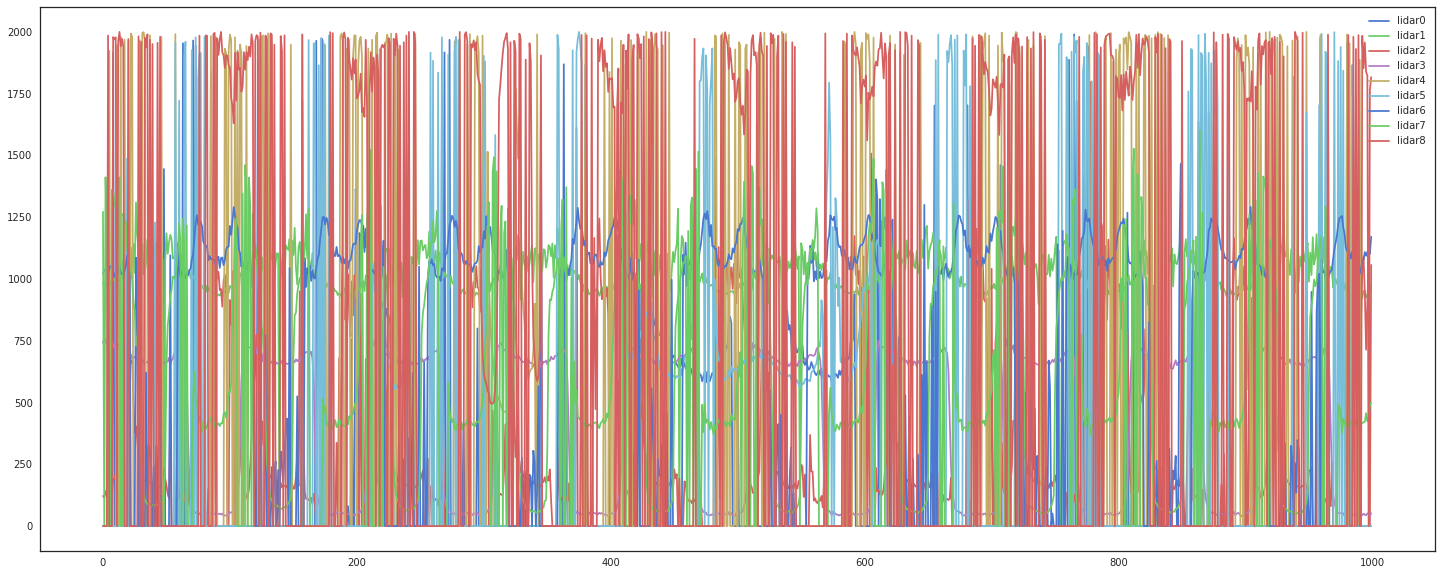

In [23]:
# raw data all lidars (lineplot)
plt.figure(figsize=(25, 10))
for i in range(lidar_data.shape[1]):
    plt.plot(lidar_data[:, i], label='lidar{}'.format(i))
plt.legend(loc=1)

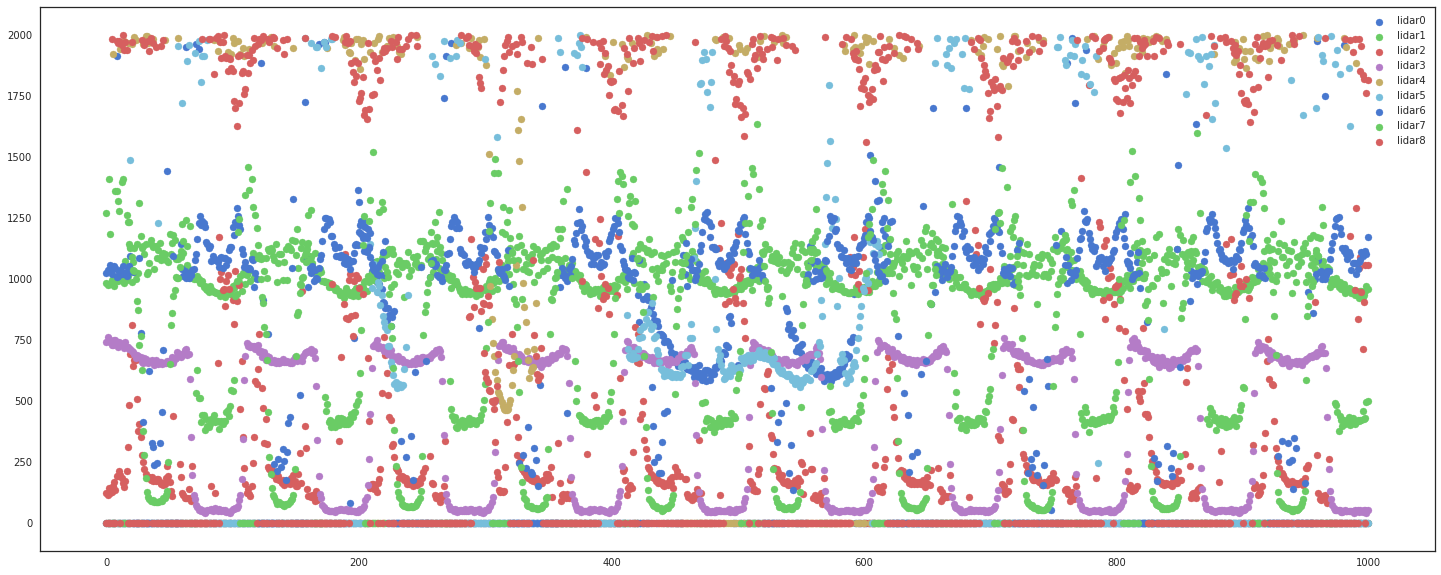

In [33]:
# raw data all lidars (scatterplot)
plt.figure(figsize=(25, 10))
for i in range(lidar_data.shape[1]):
    plt.scatter(np.arange(len(lidar_data)), lidar_data[:, i], label='lidar{}'.format(i))
plt.legend(loc=1)
plt.show()

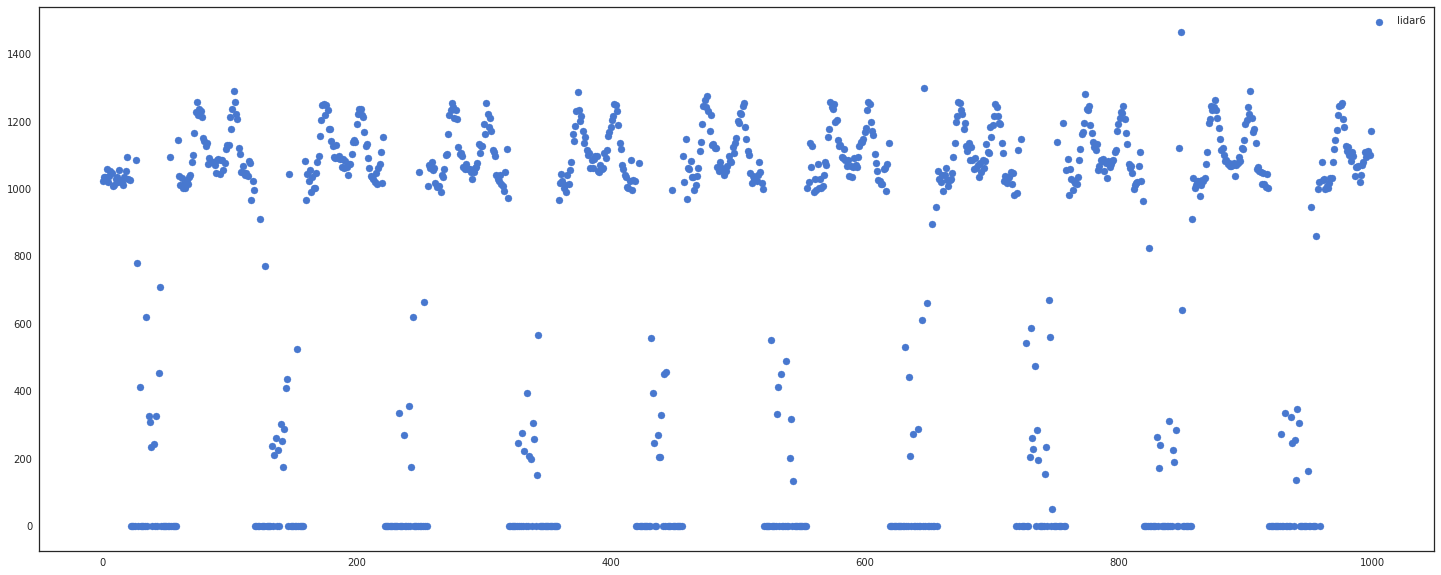

In [34]:
# lidar4 raw data
plt.figure(figsize=(25, 10))
plt.scatter(np.arange(len(lidar_data)), lidar_data[:, 6], label='lidar{}'.format(6))
plt.legend(loc=1)
plt.show()

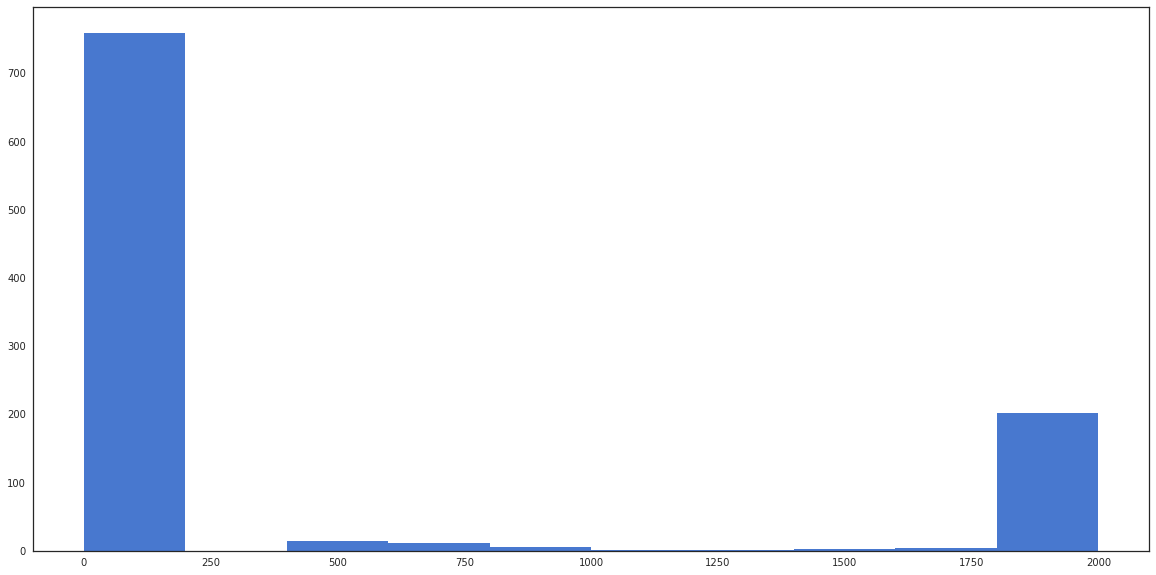

In [35]:
plt.figure(figsize=(20,10))
plt.hist(lidar_data[:, 4])
plt.show()

In [37]:
km = KMeans(n_clusters=3, max_iter=10000)

In [38]:
km.fit(lidar_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
km.predict(lidar_data)

array([1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1,
       0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2,
       2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1,

In [41]:
gm = GaussianMixture(n_components=3, max_iter=10000)

In [42]:
gm.fit(lidar_data)
gm.bic(lidar_data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=10000,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [47]:
gm.predict(lidar_data)

array([2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2,
       0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2,
       1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1,
       0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,

In [48]:
bgm = BayesianGaussianMixture(n_components=3, max_iter=10000)

In [49]:
bgm.fit(lidar_data)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=10000, mean_precision_prior=None, mean_prior=None,
            n_components=3, n_init=1, random_state=None, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process')

In [50]:
bgm.predict(lidar_data)

array([0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0,
       1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2,
       2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1,

In [51]:
tsne = TSNE()

In [53]:
lidar_2dim = tsne.fit_transform(lidar_data)

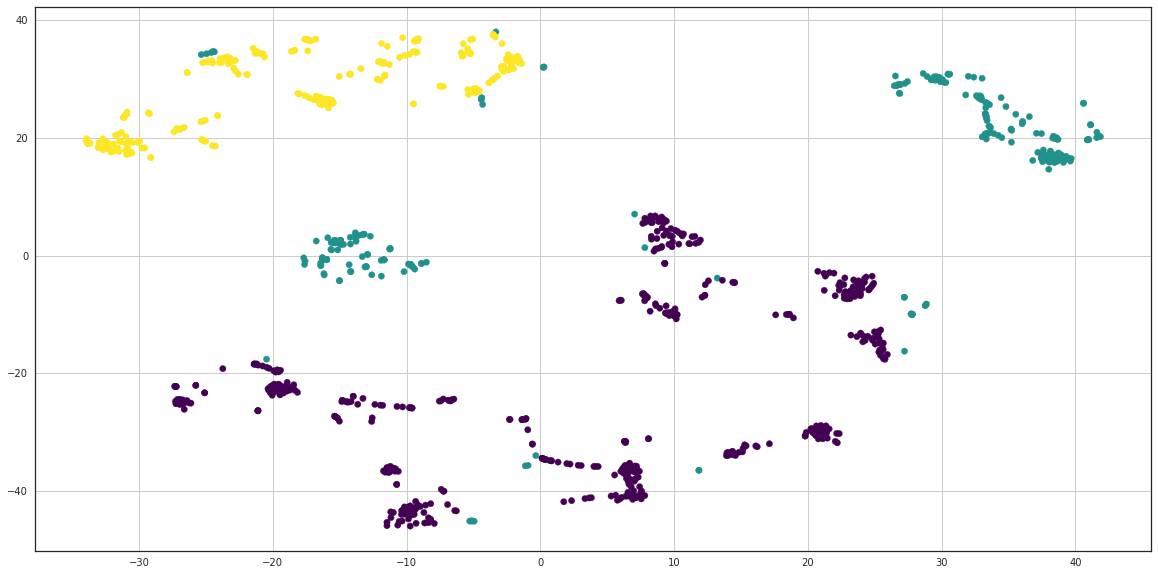

In [54]:
plt.figure(figsize=(20,10))
plt.scatter(lidar_2dim[:, 0], lidar_2dim[:, 1], c=bgm.predict(lidar_data), s=40, cmap='viridis')
plt.grid()